In [1]:
# Run this cell
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import shap
%matplotlib inline


In [2]:
data = pd.read_csv('./data/data.csv')
data = data.fillna(0)
data.head()

,CuChun,JingChun,ErJiaMi,CuSuan,YiChangYiErChun,ErChangYiErChun,YeTiChanPin,YiJing,FaDianLiang,YiQiYouXiaoQi,ErQiYouXiaoQi,YiErChunQingZuFen,YiErChunZhongZuFen,RanMei
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,438.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,433.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,432.0


In [5]:
from EDAandPCA import get_pca_features
from sklearn.model_selection import train_test_split
np.random.seed(45)

X = get_pca_features('./data/data.csv')
Y = data['RanMei']

X_train, X_holdout, Y_train, Y_holdout = train_test_split(X, Y, test_size=0.1)


<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
C:\Users\24349\AppData\Local\Temp\ipykernel_18720\1190687836.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("Predicted RanMei $(\hat{y})$")


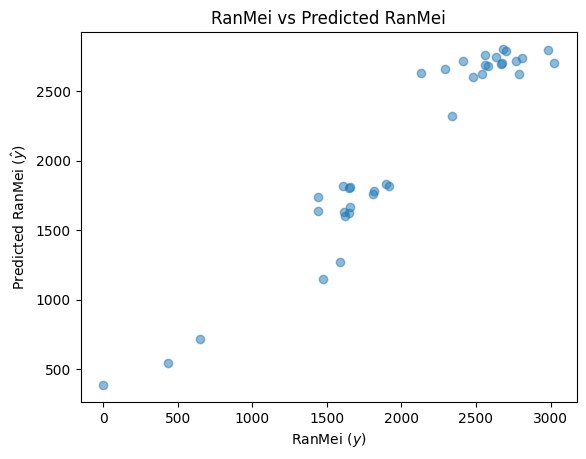

In [6]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_holdout)

# Plot predicted vs true RanMei
plt.scatter(Y_holdout, Y_pred, alpha=0.5)
plt.xlabel("RanMei $(y)$")
plt.ylabel("Predicted RanMei $(\hat{y})$")
plt.title("RanMei vs Predicted RanMei");


<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
C:\Users\24349\AppData\Local\Temp\ipykernel_18720\1349071221.py:2: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("Residual $(y - \hat{y})$")
C:\Users\24349\AppData\Local\Temp\ipykernel_18720\1349071221.py:3: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel("Predicted RanMei $(\hat{y})$")


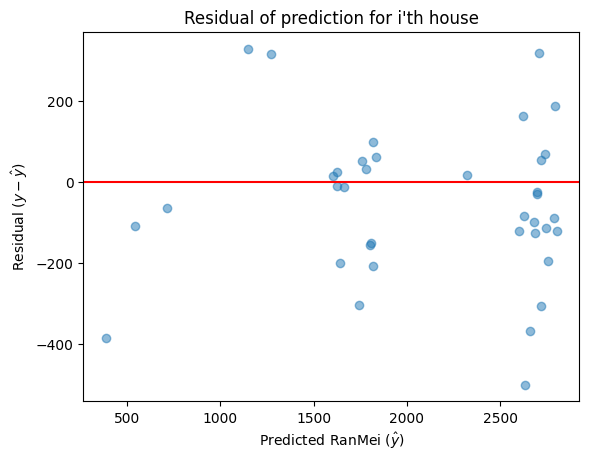

In [7]:
plt.scatter(Y_pred, Y_holdout - Y_pred, alpha=0.5)
plt.ylabel("Residual $(y - \hat{y})$")
plt.xlabel("Predicted RanMei $(\hat{y})$")
plt.title("Residuals vs Predicted RanMei")
plt.title("Residual of prediction for i'th house")
plt.axhline(y = 0, color='r');


In [8]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the ground-truth label
        
    Returns:
        The root mean square error between the prediction and the ground-truth
    """
    return np.sqrt(np.mean((predicted_y - actual_y)**2))

train_error = rmse(Y_train, model.predict(X_train))
holdout_error = rmse(Y_holdout, Y_pred)

print("Training RMSE:", train_error)
print("Holdout RMSE:", holdout_error)


Training RMSE: 192.0784603024534
Holdout RMSE: 193.93051810409256


## shap display

In [9]:
background = shap.utils.sample(X, 100)
explainer = shap.Explainer(model.predict, background)
shap_values = explainer(X)

.values =
array([[-9.73105991e+02, -6.12624732e+02, -9.61778952e+01,
        -5.32825683e+01],
       [-9.73105991e+02, -6.12624732e+02, -9.61778952e+01,
        -5.32825683e+01],
       [-9.34910770e+02, -5.87397302e+02, -8.11910394e+01,
        -1.53450425e+01],
       ...,
       [ 5.69492041e+02, -7.87159779e+01,  9.65918183e-01,
        -4.49587776e+01],
       [ 6.99648220e+02, -4.70114556e+01, -1.81062227e+01,
        -1.04212240e+01],
       [ 5.80071571e+02, -1.08195845e+02, -2.19297357e+01,
        -1.03704280e+02]])

.base_values =
array([2122.09471766, 2122.09471766, 2122.09471766, 2122.09471766,
       2122.09471766, 2122.09471766, 2122.09471766, 2122.09471766,
       2122.09471766, 2122.09471766, 2122.09471766, 2122.09471766,
       2122.09471766, 2122.09471766, 2122.09471766, 2122.09471766,
       2122.09471766, 2122.09471766, 2122.09471766, 2122.09471766,
       2122.09471766, 2122.09471766, 2122.09471766, 2122.09471766,
       2122.09471766, 2122.09471766, 2122.0947176

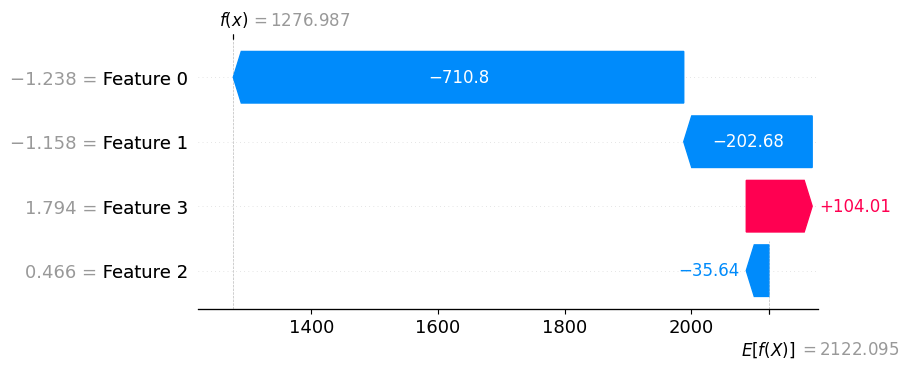

In [10]:
sample_id = np.random.randint(0, len(X))
print(shap_values)
print(shap_values.shape)
shap.plots.waterfall(shap_values[sample_id], max_display=15)

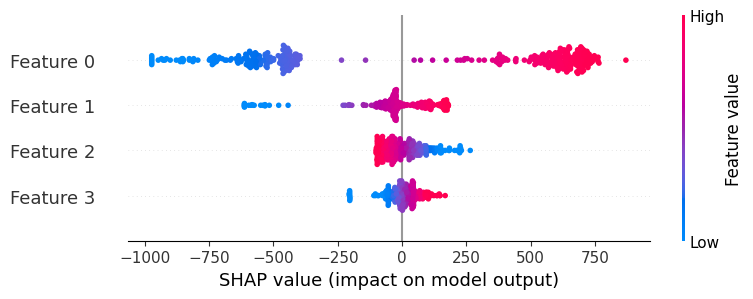

In [11]:
shap.summary_plot(shap_values, X)